In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

In [85]:
Data=[[[(i+j)/100] for i in range(5)] for j in range(100)]
target=[(i+5)/100 for i in range(100)]

In [86]:
Data

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]],
 [[0.05], [0.06], [0.07], [0.08], [0.09]],
 [[0.06], [0.07], [0.08], [0.09], [0.1]],
 [[0.07], [0.08], [0.09], [0.1], [0.11]],
 [[0.08], [0.09], [0.1], [0.11], [0.12]],
 [[0.09], [0.1], [0.11], [0.12], [0.13]],
 [[0.1], [0.11], [0.12], [0.13], [0.14]],
 [[0.11], [0.12], [0.13], [0.14], [0.15]],
 [[0.12], [0.13], [0.14], [0.15], [0.16]],
 [[0.13], [0.14], [0.15], [0.16], [0.17]],
 [[0.14], [0.15], [0.16], [0.17], [0.18]],
 [[0.15], [0.16], [0.17], [0.18], [0.19]],
 [[0.16], [0.17], [0.18], [0.19], [0.2]],
 [[0.17], [0.18], [0.19], [0.2], [0.21]],
 [[0.18], [0.19], [0.2], [0.21], [0.22]],
 [[0.19], [0.2], [0.21], [0.22], [0.23]],
 [[0.2], [0.21], [0.22], [0.23], [0.24]],
 [[0.21], [0.22], [0.23], [0.24], [0.25]],
 [[0.22], [0.23], [0.24], [0.25], [0.26]],
 [[0.23], [0.24], [0.2

In [87]:
data=np.array(Data,dtype=float)
target=np.array(target,dtype=float)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=4)

In [89]:
model=Sequential()

In [90]:
model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

In [91]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 5, 1)              12        
_________________________________________________________________
lstm_12 (LSTM)               (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [93]:
history=model.fit(x_train,y_train,epochs=400,validation_data=(x_test,y_test))

Epoch 1/400
3/3 [==============================] - 1s 216ms/step - loss: 0.4674 - accuracy: 0.0000e+00 - val_loss: 0.3682 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 9ms/step - loss: 0.4626 - accuracy: 0.0000e+00 - val_loss: 0.3635 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 8ms/step - loss: 0.4577 - accuracy: 0.0000e+00 - val_loss: 0.3587 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 8ms/step - loss: 0.4527 - accuracy: 0.0000e+00 - val_loss: 0.3539 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 8ms/step - loss: 0.4477 - accuracy: 0.0000e+00 - val_loss: 0.3489 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 8ms/step - loss: 0.4425 - accuracy: 0.0000e+00 - val_loss: 0.3439 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 8ms/step - loss: 0.4372 - accuracy: 0.0000e+00 - val_loss: 0.3

In [94]:
results=model.predict(x_test)

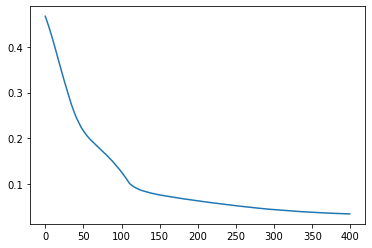

In [95]:
plt.plot(history.history['loss'])
plt.show()